# Genk network - non-linear model

## Imports

In [1]:
import modesto.main
import modesto.utils as ut
from pkg_resources import resource_filename
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib notebook

## Optimization settings

In [2]:
horizon = 1*3600
time_step = 60

n_neighs = 3

start_time = pd.Timestamp('20140101')
n_steps = int(horizon/time_step)

## Neighborhood data

In [3]:
neighs = ['WaterscheiGarden', 
          'ZwartbergNEast', 
          'ZwartbergNWest', 
          'ZwartbergSouth', 
          'OudWinterslag', 
          'Winterslag',
          'Boxbergheide', 
          'TermienEast', 
          'TermienWest']

In [4]:
all_pipes = ['dist_pipe{}'.format(i) for i in range(14)]

diams = {1: [350, 0, 350],
         2: [400, 250, 350],
         3: [450, 250, 350, 200, 200],
         4: [500, 250, 350, 350, 200, 300],
         5: [500, 250, 350, 350, 400, 300, 200, 200],
         6: [600, 250, 350, 500, 200, 300, 400, 200, 350, 0, 350],
         7: [700, 250, 350, 600, 200, 300, 500, 200, 500, 400, 350],
         8: [700, 250, 350, 600, 200, 300, 500, 200, 500, 400, 350, 200, 200],
         9: [700, 250, 350, 600, 200, 300, 600, 200, 500, 400, 350, 300, 200, 250]}

diameters = diams[n_neighs]

### Network graph

In [5]:
 g = nx.DiGraph()

g.add_node('Producer', x=5000, y=5000, z=0,
           comps={'plant': 'Plant'})
g.add_node('p1', x=3500, y=6100, z=0,
           comps={})
if n_neighs >= 1:
    g.add_node('WaterscheiGarden', x=3500, y=5100, z=0,
               comps={'building': 'SubstationepsNTU',})
                      # 'DHW': 'BuildingFixed'})
if n_neighs >= 2:
    g.add_node('ZwartbergNEast', x=3300, y=6700, z=0,
               comps={'building': 'SubstationepsNTU',})
                     # 'DHW': 'BuildingFixed'})
if n_neighs >= 3:
    g.add_node('p2', x=1700, y=6300, z=0,
               comps={})
    g.add_node('ZwartbergNWest', x=1500, y=6600, z=0,
               comps={'building': 'SubstationepsNTU',})
                      # 'DHW': 'BuildingFixed'})
if n_neighs >= 4:
    g.add_node('ZwartbergSouth', x=2000, y=6000, z=0,
               comps={'building': 'SubstationepsNTU',})
                      # 'DHW': 'BuildingFixed'})
if n_neighs >= 5:
    g.add_node('p3', x=250, y=5200, z=0,
               comps={})
    g.add_node('OudWinterslag', x=1700, y=4000, z=0,
               comps={'building': 'SubstationepsNTU',})
                      # 'DHW': 'BuildingFixed'})
if n_neighs >= 6:
    g.add_node('p4', x=0, y=2700, z=0,
               comps={})
    g.add_node('Winterslag', x=1000, y=2500, z=0,
               comps={'building': 'SubstationepsNTU',})
                      # 'DHW': 'BuildingFixed'})
if n_neighs >= 7:
    g.add_node('Boxbergheide', x=-1200, y=2100, z=0,
               comps={'building': 'SubstationepsNTU',})
                      # 'DHW': 'BuildingFixed'})
if n_neighs >= 8:
    g.add_node('p5', x=620, y=700, z=0,
               comps={})
    g.add_node('TermienEast', x=800, y=880, z=0,
               comps={'building': 'SubstationepsNTU',})
                      # 'DHW': 'BuildingFixed'})
if n_neighs >= 9:
    g.add_node('TermienWest', x=0, y=0, z=0,
               comps={'building': 'SubstationepsNTU',})
                      # 'DHW': 'BuildingFixed'})

In [6]:
pipes = []

if n_neighs >= 1:
    g.add_edge('Producer', 'p1', name='dist_pipe0')
    g.add_edge('p1', 'WaterscheiGarden', name='dist_pipe2')
    pipes.append('dist_pipe0')
    pipes.append('dist_pipe2')
if n_neighs >= 2:
    g.add_edge('p1', 'ZwartbergNEast', name='dist_pipe1')
    pipes.append('dist_pipe1')
if n_neighs >= 3:
    g.add_edge('p1', 'p2', name='dist_pipe3')
    g.add_edge('p2', 'ZwartbergNWest', name='dist_pipe4')
    pipes.append('dist_pipe3')
    pipes.append('dist_pipe4')
if n_neighs >= 4:
    g.add_edge('p2', 'ZwartbergSouth', name='dist_pipe5')
    pipes.append('dist_pipe5')
if n_neighs >= 5:
    g.add_edge('p2', 'p3', name='dist_pipe6')
    g.add_edge('p3', 'OudWinterslag', name='dist_pipe7')
    pipes.append('dist_pipe6')
    pipes.append('dist_pipe7')
if n_neighs >= 6:
    g.add_edge('p3', 'p4', name='dist_pipe8')
    g.add_edge('p4', 'Winterslag', name='dist_pipe10')
    pipes.append('dist_pipe8')
    pipes.append('dist_pipe10')
if n_neighs >= 7:
    g.add_edge('p4', 'Boxbergheide', name='dist_pipe9')
    pipes.append('dist_pipe9')
if n_neighs >= 8:
    g.add_edge('p4', 'p5', name='dist_pipe11')
    g.add_edge('p5', 'TermienEast', name='dist_pipe12')
    pipes.append('dist_pipe11')
    pipes.append('dist_pipe12')
if n_neighs >= 9:
    g.add_edge('p5', 'TermienWest', name='dist_pipe13')
    pipes.append('dist_pipe13')

## The modesto object

In [7]:
optmodel = modesto.main.Modesto(pipe_model='FiniteVolumePipe', graph=g, temperature_driven=True)
optmodel.opt_settings(allow_flow_reversal=False)

## Load data

In [8]:
heat_profile = ut.read_time_data(resource_filename(
        'modesto', 'Data/HeatDemand'), name='TEASER_GenkNET_per_neighb.csv')

t_amb = ut.read_time_data(resource_filename('modesto', 'Data/Weather'), name='extT.csv')['Te']
t_g = pd.Series(12 + 273.15, index=t_amb.index)

wd = ut.read_time_data(resource_filename('modesto', 'Data'), name='Weather/weatherData.csv')
QsolN = wd['QsolN']
QsolE = wd['QsolE']
QsolS = wd['QsolS']
QsolW = wd['QsolW']

c_f = ut.read_time_data(path=resource_filename('modesto', 'Data'), name='ElectricityPrices/DAM_electricity_prices-2014_BE.csv')['price_BE']

mults = ut.read_file(resource_filename(
    'modesto', 'Data/HeatDemand'), name='TEASER_number_of_buildings.csv', timestamp=False).loc['Number of buildings']

## Parameters

In [9]:
general_params = {'Te': t_amb,
                  'Tg': t_g,
                  'Q_sol_E': QsolE,
                  'Q_sol_W': QsolW,
                  'Q_sol_S': QsolS,
                  'Q_sol_N': QsolN,
                  'time_step': time_step,
                  'horizon': horizon,
                  'elec_cost': c_f}

optmodel.change_params(general_params)

In [10]:
for n in range(n_neighs):
    neigh = neighs[n]
    building_params = {
        'mult': mults[neigh],
        'heat_flow': heat_profile[neigh] / mults[neigh],
        'temperature_radiator_in': 47 + 273.15,
        'temperature_radiator_out': 35 + 273.15,
        'temperature_supply_0': 60 + 273.15,
        'temperature_return_0': 40 + 273.15,
        'lines': ['supply', 'return'],
        'thermal_size_HEx': 15000,
        'exponential_HEx': 0.7,
        'mf_prim_0': 0.2
    }

    optmodel.change_params(building_params, node=neigh, comp='building')

In [11]:
for i, pipe in enumerate(pipes):
    pipe_params = {'diameter': diameters[all_pipes.index(pipe)],
                   'max_speed': 3,
                   'Courant': 1,
                   'Tg': pd.Series(12+273.15, index=t_amb.index),
                   'Tsup0': 57+273.15,
                   'Tret0': 40+273.15,
                   }

    optmodel.change_params(pipe_params, comp=pipe)

In [12]:
prod_design = {'efficiency': 1,
               'PEF': 1,
               'CO2': 0.178,  # based on HHV of CH4 (kg/KWh CH4)
               'fuel_cost': pd.Series([0.25] * int(n_steps/2) + [0.5] * (n_steps - int(n_steps/2))),
               # http://ec.europa.eu/eurostat/statistics-explained/index.php/Energy_price_statistics (euro/kWh CH4)
               'Qmax': 1.5e12,
               'ramp_cost': 0,
               'CO2_price': c_f,
               'temperature_max': 90 + 273.15,
               'temperature_min': 57 + 273.15,
               'temperature_supply_0': 65 + 273.15,
               'temperature_return_0': 30 + 273.15,
               'heat_estimate': heat_profile['WaterscheiGarden'] + heat_profile['ZwartbergNEast']}

optmodel.change_params(prod_design, 'Producer', 'plant')

## Compilation and solving

In [13]:
compile_order = [['Producer', None],
                 ['Producer', 'plant']]

if n_neighs >= 1:
    compile_order.insert(0, [None, 'dist_pipe0'])
    compile_order.insert(0, ['p1', None])
    compile_order.insert(0, [None, 'dist_pipe2'])
if n_neighs >= 2:
    compile_order.insert(0, [None, 'dist_pipe1'])
if n_neighs >= 3:
    compile_order.insert(0, [None, 'dist_pipe3'])
    compile_order.insert(0, ['p2', None])
    compile_order.insert(0, [None, 'dist_pipe4'])
if n_neighs >= 4:
    compile_order.insert(0, [None, 'dist_pipe5'])
if n_neighs >= 5:
    compile_order.insert(0, [None, 'dist_pipe6'])
    compile_order.insert(0, ['p3', None])
    compile_order.insert(0, [None, 'dist_pipe7'])
if n_neighs >= 6:
    compile_order.insert(0, [None, 'dist_pipe8'])
    compile_order.insert(0, ['p4', None])
    compile_order.insert(0, [None, 'dist_pipe10'])
if n_neighs >= 7:
    compile_order.insert(0, [None, 'dist_pipe9'])
if n_neighs >= 8:
    compile_order.insert(0, [None, 'dist_pipe11'])
    compile_order.insert(0, ['p5', None])
    compile_order.insert(0, [None, 'dist_pipe12'])
if n_neighs >= 9:
    compile_order.insert(0, [None, 'dist_pipe13'])
for n in range(n_neighs):
    compile_order.insert(0, [neighs[n], None])
    compile_order.insert(0, [neighs[n], 'building'])

In [14]:
optmodel.compile(start_time=start_time,
                 compile_order=compile_order)

optmodel.set_objective('cost')

optmodel.solve(tee=True, mipgap=0.2, last_results=False, g_describe=[300])

dist_pipe0 has 11 volumes, one element has a length of 169.10068397943886
dist_pipe2 has 6 volumes, one element has a length of 166.66666666666666
dist_pipe1 has 4 volumes, one element has a length of 158.11388300841898
dist_pipe3 has 11 volumes, one element has a length of 164.64336614795303
dist_pipe4 has 3 volumes, one element has a length of 120.18504251546631
Time to compile:  5.932889461517334 


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    22007


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]


  23r4.2796705e+004 7.23e+002 1.87e+003   0.9 4.18e+000   2.3 2.28e-001 1.20e-003f  9


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  24r4.2796705e+004 7.23e+002 1.87e+003   0.9 1.23e+001   1.8 2.43e-001 1.01e-004f 12


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  25r4.2796705e+004 7.23e+002 1.87e+003   0.9 4.67e+000   2.2 9.64e-002 8.10e-007f 20


 WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0

  26r4.2796705e+004 7.23e+002 1.87e+003   0.9 1.35e+001   1.8 4.49e-001 2.26e-007f 21


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  27r4.2796705e+004 7.23e+002 1.87e+003   0.9 5.11e+000   2.2 1.61e-001 1.12e-007f 23


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  28r4.2796705e+004 7.23e+002 1.87e+003   0.9 8.63e+000   1.7 2.15e-001 1.69e-008f 25


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  29r4.2796705e+004 7.23e+002 3.02e+003   0.9 3.31e+000   2.1 1.09e-001 3.23e-005f 15
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30r4.2796705e+004 7.22e+002 2.11e+004   0.9 9.59e+000   1.7 3.44e-001 4.66e-003f  7


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  31r4.2796705e+004 7.22e+002 4.59e+004   0.9 7.50e-001  11.5 3.87e-002 6.17e-009h 22
  32r4.2796705e+004 7.22e+002 4.59e+004   0.9 7.50e-001  11.9 0.00e+000 1.93e-010R 26
  33r4.2796705e+004 7.22e+002 4.58e+004   0.9 6.53e-010  12.4 9.90e-001 3.12e-002f  6


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  34r4.2796705e+004 7.22e+002 4.61e+004   0.9 8.23e-009  11.9 1.00e+000 2.44e-004f 13


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  35r4.2796705e+004 7.22e+002 4.62e+004   0.9 1.94e-009  12.3 1.00e+000 6.10e-005h 15


solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../

  36r4.2796705e+004 7.22e+002 4.62e+004   0.9 6.14e-010  12.7 1.00e+000 7.63e-006h 18


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  37r4.2796705e+004 7.22e+002 4.62e+004   0.9 1.16e-010  13.2 1.00e+000 7.63e-006h 18
  38r4.2796705e+004 7.22e+002 4.62e+004   0.9 3.87e-011  13.6 1.00e+000 7.63e-006h 18
  39r4.2796705e+004 7.22e+002 4.62e+004   0.9 1.45e-011  14.0 1.00e+000 1.91e-006h 20


 WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40r4.2796705e+004 7.22e+002 4.62e+004   0.9 7.27e-011  13.5 1.00e+000 2.38e-007h 23


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  41r4.2796705e+004 7.22e+002 4.62e+004   0.9 1.77e-011  14.0 1.00e+000 1.19e-007h 24
  42r4.2796705e+004 7.22e+002 4.62e+004   0.9 6.13e-012  14.4 1.00e+000 1.19e-007h 24


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  43r4.2796705e+004 7.22e+002 4.62e+004   0.9 1.99e-009  13.9 1.00e+000 1.16e-010h 33


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  44r4.2796705e+004 7.22e+002 4.62e+004   0.9 8.65e-013  15.2 1.00e+000 3.73e-009h 29


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  45r4.2796705e+004 7.22e+002 4.62e+004   0.9 4.66e-012  14.8 1.00e+000 2.33e-010h 33


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row

  46r4.2796705e+004 7.22e+002 4.62e+004   0.9 9.83e-013  15.2 1.00e+000 2.33e-010h 33


 WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0

  47r4.2796705e+004 7.22e+002 4.62e+004   0.9 3.67e-013  15.6 1.00e+000 2.33e-010h 33


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  48r4.2796705e+004 7.22e+002 4.62e+004   0.9 3.47e-012  15.1 1.00e+000 7.28e-012h 38


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  49r4.2796705e+004 7.22e+002 4.62e+004   0.9 4.37e-013  15.6 1.00e+000 2.91e-011h 36


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50r4.2796705e+004 7.22e+002 4.62e+004   0.9 1.57e-013  16.0 1.00e+000 7.28e-012h 38


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  51r4.2796705e+004 7.22e+002 4.62e+004   0.9 9.24e-014  16.4 0.00e+000 1.46e-011R 37


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  52r4.2796705e+004 7.22e+002 4.62e+004   0.9 1.93e-013  15.9 1.00e+000 1.82e-012h 40


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  53r4.2796705e+004 7.22e+002 4.62e+004   0.9 6.47e-014  16.4 1.00e+000 3.64e-012h 39


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  54r4.2796705e+004 7.22e+002 4.62e+004   0.9 6.27e-013  15.9 1.00e+000 1.14e-013h 44


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  55r4.2796705e+004 7.22e+002 4.62e+004   0.9 7.57e-014  16.3 1.00e+000 4.55e-013h 42


solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../

  56r4.2796705e+004 7.22e+002 4.62e+004   0.9 2.73e-014  16.7 1.00e+000 4.55e-013h 42


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

  57r4.2796705e+004 7.22e+002 4.62e+004   0.9 2.18e-013  16.3 1.00e+000 2.84e-014h 46


 WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0

  58r4.2796705e+004 7.22e+002 4.62e+004   0.9 3.43e-014  16.7 1.00e+000 5.68e-014h 45


.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g fai

  59r4.2796705e+004 7.22e+002 4.62e+004   0.9 1.60e-014  17.1 1.00e+000 1.42e-014h 47


CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 300, col 0).") [.../casadi/core/oracle_function.cpp:249]
CasADi -  WARNING("solver:nlp_g failed: NaN detected for output g, at (row 3

Restoration phase is called at point that is almost feasible,
  with constraint violation 5.703077e-014. Abort.
Restoration phase in the restoration phase failed.

Number of Iterations....: 59

                                   (scaled)                 (unscaled)
Objective...............:  4.2796704597150958e+004   4.2796704597150958e+004
Dual infeasibility......:  4.6180267938825447e+004   4.6180267938825447e+004
Constraint violation....:  7.0075336223472902e+001   7.2192985546981549e+002
Complementarity.........:  8.5923062609802390e+000   8.5923062609802390e+000
Overall NLP error.......:  3.8178262202669423e+004   4.6180267938825447e+004


Number of objective function evaluations             = 71
Number of objective gradient evaluations             = 7
Number of equality constraint evaluations            = 1103
Number of inequality constraint evaluations          = 62
Number of equality constraint Jacobian evaluations   = 61
Number of inequality constraint Jacobian evaluations = 61

c:\users\u0111619\documents\python\modesto\modesto\main.py:431: UserWarning: OPTIMIZATION HAS FAILED
  warnings.warn('OPTIMIZATION HAS FAILED')


## Collect results

In [15]:
# Heat flows and mass flows
prod_hf = optmodel.get_result('heat_flow', node='Producer', comp='plant')
prod_mf = optmodel.get_result('mass_flow', node='Producer', comp='plant')
neigh_hf = pd.DataFrame(columns=[neighs[i] for i in range(n_neighs)])
neigh_mf = pd.DataFrame(columns=[neighs[i] for i in range(n_neighs)])

for n in range(n_neighs):
    neigh = neighs[n]
    mult = mults[neigh]
    neigh_hf[neigh] = (optmodel.get_result('heat_flow', node=neigh, comp='building')*mult)
    neigh_mf[neigh] = (optmodel.get_result('mf_prim', node=neigh, comp='building')*mult)

In [16]:
# Temperatures
prod_T_sup = optmodel.get_result('Tsup', node='Producer', comp='plant') - 273.15
prod_T_ret = optmodel.get_result('Tret', node='Producer', comp='plant') - 273.15
neigh_T_sup = pd.DataFrame(columns=[neighs[i] for i in range(n_neighs)])
neigh_T_ret = pd.DataFrame(columns=[neighs[i] for i in range(n_neighs)])
slack = pd.DataFrame(columns=[neighs[i] for i in range(n_neighs)])

for n in range(n_neighs):
    neigh = neighs[n]
    mult = mults[neigh]
    neigh_T_sup[neigh] = (optmodel.get_result('Tpsup', node=neigh, comp='building') - 273.15)
    neigh_T_ret[neigh] = (optmodel.get_result('Tpret', node=neigh, comp='building') - 273.15)
    # slack[neigh] = optmodel.get_result('hf_slack', node=neigh, comp='building')

In [17]:
prod_e = sum(prod_hf)
neigh_e = neigh_hf.sum(axis=0)

# Efficiency
print('\nNetwork')
print('Efficiency', (sum(neigh_e)) / (prod_e + 0.00001) * 100, '%')


Network
Efficiency 58.173549733890354 %


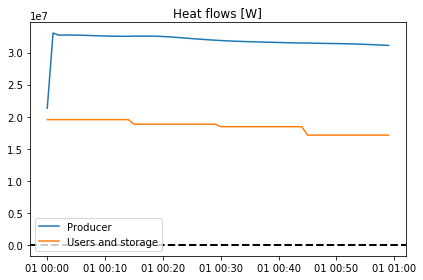

In [18]:
fig= plt.figure()
ax = fig.add_subplot(111)
ax.plot(prod_hf, label='Producer')
ax.plot(neigh_hf.sum(axis=1), label='Users and storage')
ax.axhline(y=0, linewidth=2, color='k', linestyle='--')
ax.set_title('Heat flows [W]')
ax.legend()
fig.tight_layout()

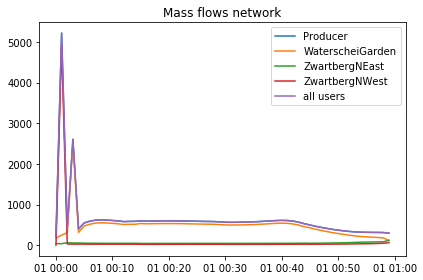

In [19]:
fig1, axarr = plt.subplots(1, 1)
axarr.plot(prod_mf, label='Producer')
for neigh in [neighs[i] for i in range(n_neighs)]:
    axarr.plot(neigh_mf[neigh], label=neigh)
axarr.plot(neigh_mf.sum(axis=1), label='all users')
axarr.set_title('Mass flows network')
axarr.legend()
fig1.tight_layout()

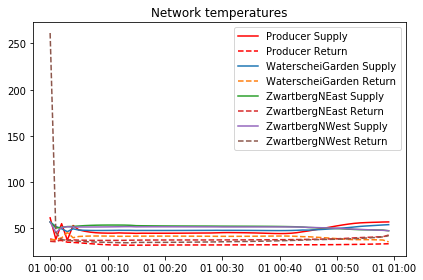

In [20]:
fig2, axarr = plt.subplots(1, 1)
axarr.plot(prod_T_sup, label='Producer Supply', color='r')
axarr.plot(prod_T_ret, label='Producer Return', linestyle='--', color='r')
for neigh in [neighs[i] for i in range(n_neighs)]:
    axarr.plot(neigh_T_sup[neigh], label='{} Supply'.format(neigh))
    axarr.plot(neigh_T_ret[neigh], label='{} Return'.format(neigh), linestyle='--')
axarr.legend()
axarr.set_title('Network temperatures')
fig2.tight_layout()